In [2]:
!pip install --user -r requirements.txt

  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)
  Using cached ipython-8.4.0-py3-none-any.whl (750 kB)
  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached numpy-1.21.5-cp39-cp39-win_amd64.whl (14.0 MB)
  Using cached opencv_python_headless-4.6.0.66-cp36-abi3-win_amd64.whl (35.5 MB)
  Using cached pandas-1.4.2-cp39-cp39-win_amd64.whl (10.5 MB)
     -------------------------------------- 12.6/12.6 MB 121.0 kB/s eta 0:00:00
     ------------------------------          29.2/36.9 MB 64.5 kB/s eta 0:02:01


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\User\

In [3]:
from intelligent_placer_lib.image_processing import *


# Обработка и получение масок 10 изображений

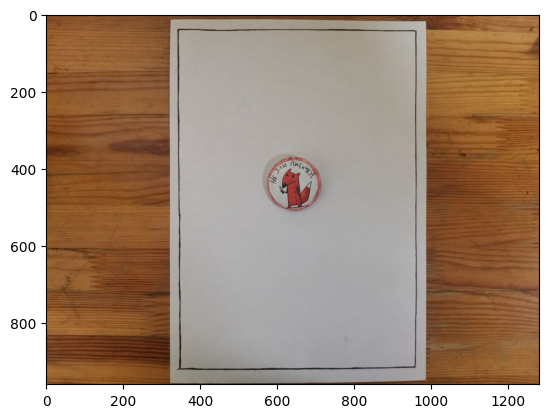

In [3]:
# Загрузим изображения
dir_iteams = './data/iteams'
im = im_upload(dir_iteams)
plt.imshow(im[1])


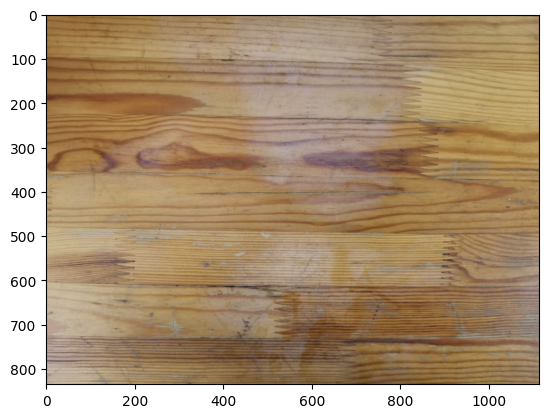

In [4]:
# Сожмем изображения для ускорения работы
c = im_comp(im)
plt.imshow(c[0])

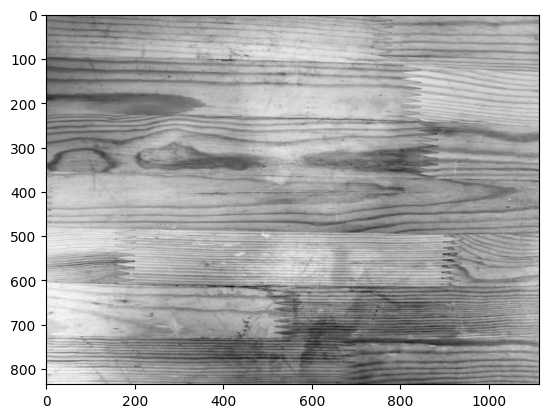

In [5]:
# Применим фильтр оттенков серого
g = set_grayscale(c)
plt.imshow(g[0], cmap='gray')


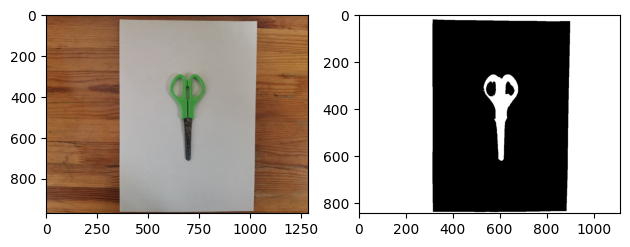

In [6]:
# Применим бинаризацию
im_otsu = binary_otsu(g)
im_otsu_open = morpholog(im_otsu)
f, ax = plt.subplots(1, 2) # создадим сетку, в которую будем выводить картинки
ax[0].imshow(im[9])
ax[1].imshow(im_otsu_open[9], cmap='gray') # выведем значение канала с чёрно-белой цветовой схемой
f.tight_layout() # добавим границы, чтобы графики не наезжали друг на друга

# plt.imshow(im[9])
# plt.imshow(im_otsu[9], cmap='gray')
# plt.axis('off')

# Поиск многоугольника и предметов на входном изображении


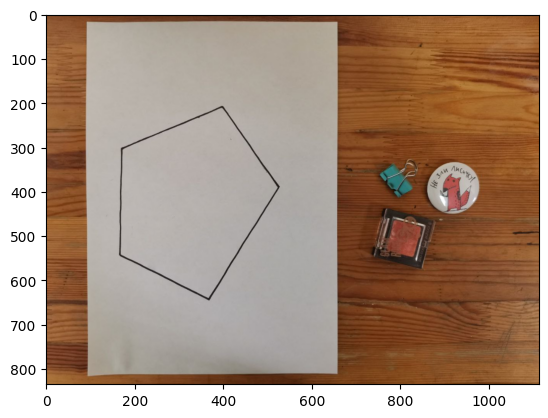

In [4]:
# Загрузим и сожмем изображения


dir_case = './data/case'
images = loading_and_preprocessing(dir_case)

plt.imshow(images[8])

In [5]:
# # Используем детектор Кэнни для поиска границ объектов
# def search_for_boundaries(images):
#     canny_images = []
#     canny_sigma = 0.2
#     canny_low_threshold = 0.055
#     high_threshold = 0.20
    
#     for image in images:
#         canny_images.append(canny(image))#, sigma=canny_sigma, low_threshold=low_threshold, high_threshold=high_threshold))
#     return canny_images

# can_im = search_for_boundaries(images)

# plt.imshow(can_im[8])

In [6]:
# Преобразуем изображения в массивы пикселей
images_arrs = get_images_arrs(images)


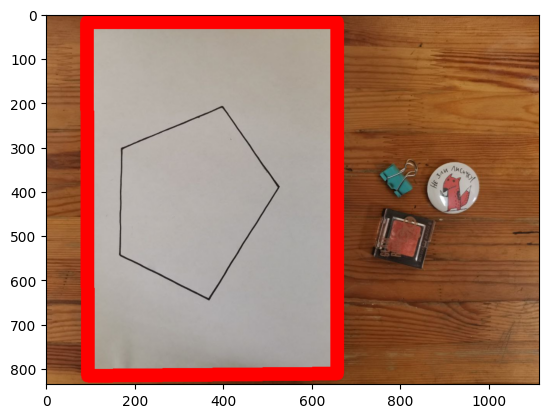

In [7]:
# Найдем контур листа 
images_contours = get_contours_list(images)

plt.imshow(images_contours[8])
plt.show()

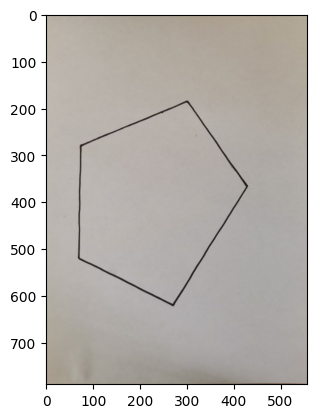

In [8]:
# Получим лист

images_list = get_list(images)

plt.imshow(images_list[8])
plt.show()

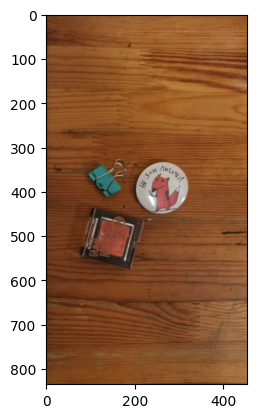

In [9]:
# Получим часть с объектами

images_objects = get_objects(images)

plt.imshow(images_objects[8])
plt.show()

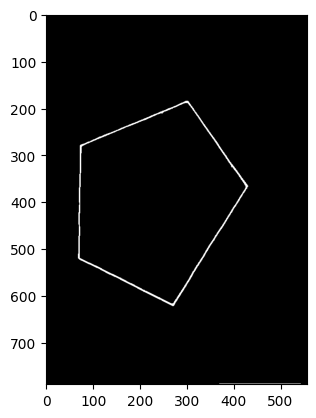

In [10]:
# Получим маску фигуры

ims_pol =  get_mask_list(images_list)
plt.imshow(ims_pol[8], cmap='gray')
plt.show()

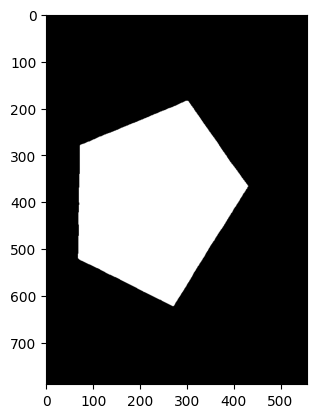

In [11]:
# Закрасим фигуру
fill_ims_pol = fill_mask_figure(ims_pol)
plt.imshow(fill_ims_pol[8], cmap='gray')
plt.show()

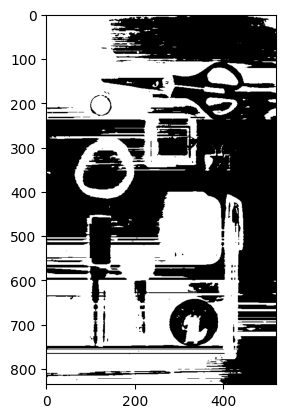

In [12]:
def get_mask_objects(imgs):
    mask_objects = []
#     o_imgs =  get_opencv_images(imgs)
    
#     for img in o_imgs:
#         imgray = cvtColor(img, COLOR_BGR2GRAY)
#         thresh = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,6)
#         #threshold(imgray, 100, 200, 8)
#         mask_objects.append(thresh)
    for img in imgs:
        igauss = gaussian(img, sigma=1, channel_axis=800)
        mask_objects.append(binary_otsu(rgb2gray(igauss)))
#         mask_objects.append(rgb2gray(igauss))
        
#     g_imgs = set_grayscale(mask_objects)
#     mask_objects = binary_otsu(g_imgs)
    return mask_objects

list_mask_objects = get_mask_objects(images_objects)
plt.imshow(list_mask_objects[5], cmap='gray')
plt.show()

Пока что используя бинаризацию Оцу подобрать параметры не получилось, возможно стоит подумать над локальной бинаризацией.
Далее, если получиться получить хорошую маску предметов без шумов на фоне, то можно использовать наложение маски фигуры на маску всех вместе взятых предметов и исползуя инвертирование, смотреть влезут ли предметы или нет. Если маска получиться с шумами, то придеться распозновать и вырезать каждый предмет. Тогда будет параллельный перенос.